# SVM for classification
Can be thought of as fitting the largest possible street.\
![title](../images/SVM1.png)

The decision function is of the form,
$$y^{(i)}\theta^TX^{(i)}$$
$$y^{(i)} = 1,\ if\ positive\ class$$
$$y^{(i)} = 0,\ if\ negative\ class$$

Therefore the generalised equation will be,
$$t^{(i)}(w^TX^{(i)} + b) >= 1$$
$$t^{(i)} = -1, if\ y^{(i)} = 0$$
$$t^{(i)} = 1, if\ y^{(i)} = 1$$

from above equation, 
* If we reduce `w`, the range of `x` increases, therefore making the street wider. eg: if w = 0.5, x range will be -2 to 2 compared to 1 to 1 for w = 1.  
* Also, the above is for hard margins (witthout any error in classification). We need to perform soft margin clasffications always to avoid,
  * Model being sensitive to outliers
  * Can be done only when the classification is linearly separable as if a data is present near the other class, it will become difficult to separate them using a linear decision boundary.
* To perform soft margin classfication, we add a `slack variable` that is $\zeta^{(i)} >= 0$, which is a measure of how much the ith instance is allowed to violate the margin.

Therefore SVM is a constrained optimisation problem with two objectives,
1. Minimise `w` to increase the street width.
2. Minimise `$\zeta$` to reduce the margin violation.

Consider the slope of `w`, that is ||w||. We need to minimise the weights using this equation. But in practise we use,
**$\frac{1}{2}||w||^2$** instead of ||w|| as it is has a simple derivative and will be derivable at w = 0.

$$\min \limits_{w, b} \frac{1}{2}w^Tw,\ for\ hard\ margin\ classification\ subject\ to\ t^{(i)}(w^TX^{(i)} + b) >= 1$$
$$\min \limits_{w, b} \frac{1}{2}w^Tw + C \sum^m \limits_{i=1} \zeta^{(i)},\ for\ soft\ margin\ classification\ subject\ to\ t^{(i)}(w^TX^{(i)} + b) >= 1 - \zeta^{(i)}$$
Therefore, 
* if C reduces, the street becomes wider as w value will reduce.
* But if we reduce C beyond a certain limit, it will end up underfitting the model

It can be solved using `hinge loss` or `squared hinge loss`

![title](../images/SVM4.png)

Squared hinge loss is preferred, as
* Squared hinge loss will be more sensitive to outliers
* Will have faster convergence for clean data

$$\ell(y) = \sum^m \limits_{i=1} \max(0, 1 - t \cdot (w^TX^{(i)} + b))^2$$

This equation is used in place of $\zeta$, therefore feature range is widened for features with more loss (by reducing their weights). The values inside the street are called `support vectors` and we can see from the above equation that they are only ones that influence the decision boundary since the ones out of street will not have any loss.

## Dual problem
The alternate way to solve this primal problem is to use `dual problem` which under certain conditions (met by SVM) will produce same solutions as the primal problem. Since it is a constrained optimisation problem, by `Lagrangian multiplier method` for equality constraint (can be applied to inquality constaint as well, since SVM meets certain conditions), the `Lagragian` or the `Lagrangian function` is given by,
$$C(w,b,\alpha) = optimisation\ function - \sum^{m} \limits_{i=1} constraint$$
$$C(w,b,\alpha) = \frac{1}{2}w^Tw - \sum^{m} \limits_{i=1} \alpha^{(i)}(t^{(i)}(w^Tx^{(i)} + b) - 1)$$

By lagrangian, there exists $\alpha$ where $(\hat{x}, \hat{y}, \hat{\alpha})$ which is stationary, that is its partial derivative will be 0. Therefore, by taking the partial derivative we will be able to compute the solutions for the constrained optimisation problem.

$$\nabla_w C = w - \sum^{m} \limits_{i=1} \alpha^{(i)}(t^{(i)}x^{(i)} = 0$$
$$\nabla_b C = - \sum^{m} \limits_{i=1} \alpha^{(i)}(t^{(i)} = 0$$

Substituting, in the above equation we will get
$$C(w,b,\alpha) = \frac{1}{2} \sum^{m} \limits_{i=1} \sum^{m} \limits_{j=1} \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} x^{(i)} x^{(j)} - \sum^{m} \limits_{i=1} \alpha^{(i)}$$

Therefore, now the objective is to minimise $\alpha$ to compute the $\hat{\alpha}$ to compute $\hat{w}$ and $\hat{b}$ (Note: $\hat{b}$ is computed using the upport vector equation)

$$\hat{b} = \frac{1}{m} \sum^{m} \limits_{i=1} [1 - t^{(i)}(\hat{w}^Tx^{(i)}]$$

Ths is the dual problem and the advantage is that,
* Faster to solve
* Kernel trick can be applied

## Kernelized SVM
If we need to apply a polynomial or any transformation to train a linear SVM classifier, the computation will grow and also the new dimension or feature will be genearted due to combining of multiple features. Therefore, kernel is used to compute a dot product $(a^Tb)$ without having to compute the transformation. The common kernels are,
$$Linear = K(a,b) = a^Tb$$
$$polynomial = K(a,b) = (\gamma^Tb + r)^d,\ d-\ polynomial\ degree$$
$$Gaussian RBF = K(a,b) = exp(-\gamma||a-b||^2)$$
$$sigmoid = tanh(\gamma a^Tb + r)$$

This is used in place of $x^{(i)} x^{(j)}$ in the cost function, therefore minimisation can be done withour any transformation. Also, since for prediction, we need to input `w` value which will be of the same size of the transfomed vector, to avoid it and to do prediction,

$$y_{pred}(\phi(x^n) = \hat{w}^T\phi(x^{n} + \hat{b})$$
$$y_{pred}(\phi(x^n) = \sum^{m} \limits_{i=1} \hat{\alpha^{(i)}} t^{(i)} (K(X^{i}, x^n))$$
Similarly can be kernelised for bias as well, therefore simplifying the calculation. Therefore, prediction of the transformed data can be made without any actual transformation

The SVM get affected by scaling as we can see that axis with the larger scale will happen to have narrow decision boundary (due to the range of values in contrast to the range of scale)

![title](../images/SVM2.png)

In [120]:
from sklearn.datasets import load_iris, make_moons
from sklearn.base import BaseEstimator
import numpy as np
import matplotlib.pyplot as plt

In [289]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1] # rate of change of x2. slope of x2
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    # plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
    #             zorder=-1)

def plt_data(X,y, ax):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(ax)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plt_predictions(clf, ax):
    x0s = np.linspace(ax[0], ax[1], 100)
    x1s = np.linspace(ax[2], ax[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1) # distance of 

# Linear SVC implementation using Batch Gradient Descent

In [73]:
iris = load_iris(as_frame=True)

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

In [255]:
class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000,
                 random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    # incremental learning
    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1)  # n feature weights
        b = 0

        t = np.array(y, dtype=np.float64).reshape(-1, 1) * 2 - 1
        X_t = X * t
        self.Js = []

        # Training
        for epoch in range(self.n_epochs):

            # get the indices where there will be loss
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            # hinge loss, 0 is not required since already removed by indexing
            J = 1/2 * (w * w).sum() + self.C * ((1 - X_t_sv.dot(w)).sum() - b * t_sv.sum())
            self.Js.append(J)

            # gradient of the above J function
            w_gradient_vector = w - self.C * X_t_sv.sum(axis=0).reshape(-1, 1)
            b_derivative = -self.C * t_sv.sum()

            # grad
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            
        # parameters
        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        self.support_vectors_ = X[support_vectors_idx]
        return self

    # distance between instance and decision boundary
    def decision_function(self, X): 
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return self.decision_function(X) >= 0

In [256]:
C = 2
svm_clf = MyLinearSVC(C=C, eta0=10, n_epochs=60000, random_state=2)
svm_clf.fit(X,y)

MyLinearSVC(C=2, eta0=10, n_epochs=60000, random_state=2)

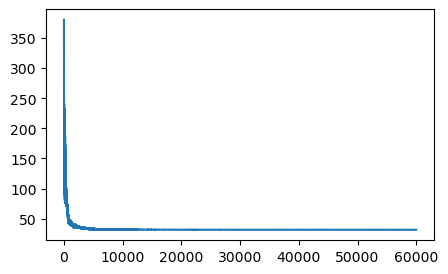

In [286]:
plt.figure(figsize=(5,3))
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)

In [259]:
svm_clf.intercept_, svm_clf.coef_

(array([-15.4783294]),
 array([[[2.26933564],
         [2.6925156 ]]]))

In [260]:
# using sklearn
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y)
svm_clf2.intercept_, svm_clf2.coef_

(array([-15.51721253]), array([[2.27128546, 2.71287145]]))

We can see the values are almost identical

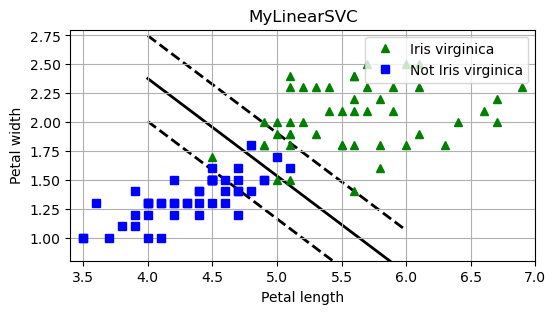

In [288]:
fig, ax = plt.subplots(ncols=1, figsize=(6,3), sharey=True)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("MyLinearSVC")
plt.axis([3.4, 7, 0.8, 2.8])
plt.legend()
plt.grid()

In [192]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # to perform binary classification of iris virginica or not

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42) # train test split

In [10]:
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42)) # training

svm_clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [12]:
svm_clf.predict(X_test) # prediction

array([False, False, False, False, False, False,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True, False, False,  True,  True, False, False, False, False,
        True, False])

In [14]:
svm_clf.decision_function(X_test) # distance of each instance from the decision boudnary

array([-5.57609751, -2.37226869, -5.65284215, -4.74879183, -0.60970268,
       -1.08449516,  0.03546445,  1.44295654,  1.36877262,  1.62765582,
       -0.21165483,  2.02570366, -1.59049764, -0.45621339, -0.65523731,
       -1.23798444, -5.77512143, -1.1612398 , -0.30272411, -1.39147372,
        0.92262942, -5.34586359,  0.21760301, -0.60970268,  0.7548155 ,
       -1.66724228, -5.69837679,  0.29434765, -5.42260823, -5.72958679,
        0.98504942,  1.7811451 , -1.26919444, -5.10130503, -2.52575797,
       -0.88547124,  1.67319046, -0.73198196])

# Nonlinear SVM classification

At all times, the data will not be lienarly separable.\
One way to overcome is to **add more polynomial features**,\
![title](../images/SVM3.png)

We can see that by simply adding a featue $(x_2 = x^2)$, the data becomes lienarly separable

In [19]:
# example
from sklearn.preprocessing import PolynomialFeatures # to add polynomial features.

In [21]:
X,y = make_moons(n_samples=100, noise = 0.15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42) # train test split

In [24]:
poly_svm_clf = make_pipeline(PolynomialFeatures(degree=3),
                             StandardScaler(),
                             LinearSVC(C=10, max_iter=10_000, random_state=42)) # faster than SVC(kernel="linear") # uses squared hinge loss by default

poly_svm_clf.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

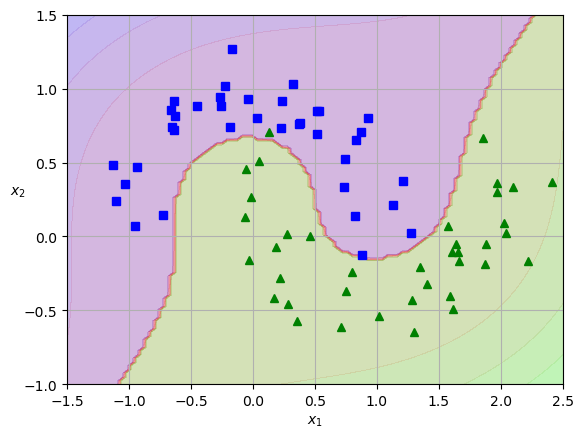

In [34]:
plt_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plt_data(X_train, y_train, [-1.5, 2.5, -1, 1.5])

As we add more featues, it slows the SVC. Reducing the number of features, gives poor classification.

Therefore **kernel trick** is used. By this method, it creates a non linear classficication just like adding polynomial features without actually adding them

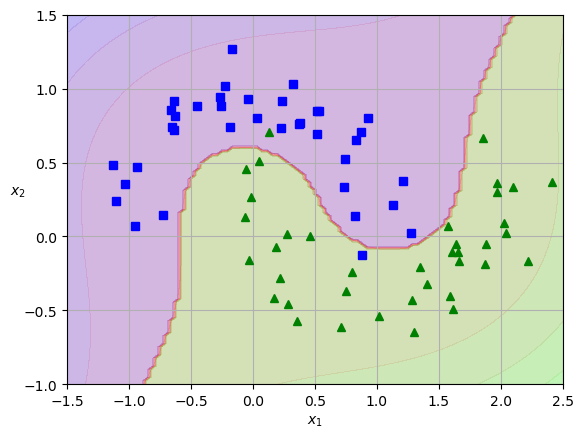

In [38]:
kernal_svm_clf = make_pipeline(StandardScaler(),
                              SVC(kernel="poly", degree=3, coef0=1, C=5))

kernal_svm_clf.fit(X_train,y_train)

plt_predictions(kernal_svm_clf, [-1.5, 2.5, -1, 1.5])
plt_data(X_train, y_train, [-1.5, 2.5, -1, 1.5])

Increase the `degree` causes overfitting beyond a ceratin limit. `coef0` controls how much the model is influenced by high degree terms versus low-degree terms

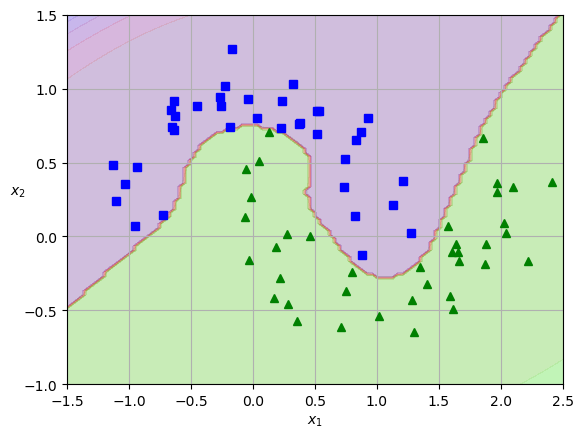

In [47]:
kernal_svm_clf = make_pipeline(StandardScaler(),
                              SVC(kernel="poly", degree=10, coef0=1, C=5)) # equal influence of all featues. uses GaussianRBF kernel by default

kernal_svm_clf.fit(X_train,y_train)

plt_predictions(kernal_svm_clf, [-1.5, 2.5, -1, 1.5])
plt_data(X_train, y_train, [-1.5, 2.5, -1, 1.5])

# SVM Regression
The difference from classification is that,
* SVM regression tries to fit as many instances on the street while limiting the margin violation (here it means instances off the street).

The width of the street is controlled by $\eta$, where increasing $\eta$ increases the number of support vectors, which regularises the model

![title](../images/SVM5.png)

$$C(w,b,\alpha) = \frac{1}{2}||w||^2 +  C \sum^m \limits_{i=1} (\xi_i)$$
where the constraint is,
$$t^{(i)} ((w^TX^{(i)} + b) - y^{(i)}) <= \epsilon + \xi_i$$
where $\xi_i$ is the slack variable which measures the amount by which predictions fall outside the support vectors ($\epsilon$ tube). This shows that the function is similar to that of teh classification and the objective is to minimise this function. The only change is that $\xi$ that is the loss (any og hinge loss or squared hinge loss) will be measured for those outside the tube.

In [294]:
from sklearn.svm import LinearSVR, SVR

In [291]:
svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

If our model requires non linearity ,use kernelised SVR. Here we use third degree polynomial

In [302]:
poly_svm_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=3, C = 0.01, epsilon=0.1))
poly_svm_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, kernel='poly'))])

In [327]:
mse_linear = (((svm_reg.predict(X) - y)**2).sum()/len(y)).item()

mse_poly = (((poly_svm_reg.predict(X) - y)**2).sum()/len(y)).item()

mse_linear, mse_poly

(0.20955004402029564, 0.10504720539023694)

We can see that the polynomial fit seems to be produce more accurate fit

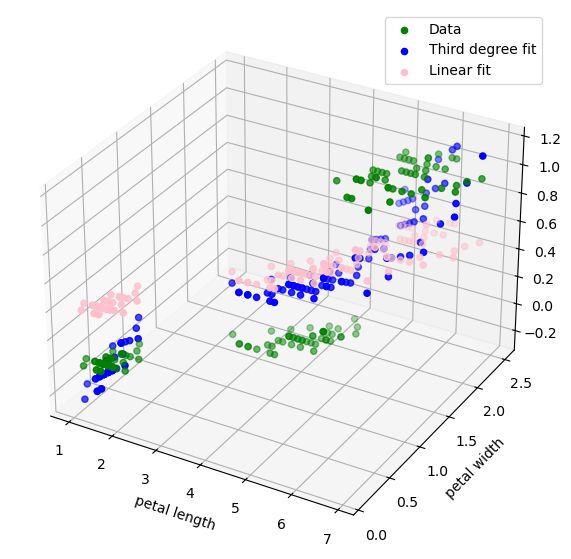

In [326]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(X[:,0], X[:,1], y, color="green", label="Data")
ax.scatter3D(X[:,0], X[:,1], poly_svm_reg.predict(X), color="blue", label="Third degree fit")
ax.scatter3D(X[:,0], X[:,1], svm_reg.predict(X), color="pink", label="Linear fit")
ax.set_ylabel("petal width")
ax.set_xlabel("petal length")
plt.legend()
plt.show()